# LAB4 : Implement Decision tree algorithm for classification

## Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## import Dataset

In [2]:
dataset =  pd.read_csv("C:\\Users\\gauri\\Downloads\\glass_quality.csv")

## EDA Steps

In [3]:
dataset.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [4]:
dataset.shape

(146, 10)

In [5]:
dataset.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Type'], dtype='object')

In [6]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146 entries, 0 to 145
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      146 non-null    float64
 1   Na      146 non-null    float64
 2   Mg      146 non-null    float64
 3   Al      146 non-null    float64
 4   Si      146 non-null    float64
 5   K       146 non-null    float64
 6   Ca      146 non-null    float64
 7   Ba      146 non-null    float64
 8   Fe      146 non-null    float64
 9   Type    146 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 11.5 KB


In [7]:
dataset.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,1.518666,13.174315,3.265959,1.291027,72.608151,0.485753,8.941164,0.032260,0.068836,1.520548
std,0.003151,0.592518,0.932494,0.320815,0.652683,0.216705,1.444449,0.267597,0.098817,0.501297
min,1.512150,10.730000,0.000000,0.290000,69.810000,0.000000,7.080000,0.000000,0.000000,1.000000
25%,1.516740,12.852500,3.430000,1.152500,72.230000,0.390000,8.155000,0.000000,0.000000,1.000000
50%,1.517765,13.190000,3.540000,1.295000,72.770000,0.570000,8.535000,0.000000,0.000000,2.000000
75%,1.519080,13.480000,3.647500,1.490000,73.027500,0.620000,9.027500,0.000000,0.140000,2.000000
max,1.533930,14.860000,4.490000,2.120000,74.450000,1.100000,16.190000,3.150000,0.350000,2.000000


## Preprocessing Steps

In [8]:
# Step 1 : Seprate input and output variables
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [9]:
print(X)
print(y)

[[ 1.52101 13.64     4.49    ...  8.75     0.       0.     ]
 [ 1.51761 13.89     3.6     ...  7.83     0.       0.     ]
 [ 1.51618 13.53     3.55    ...  7.78     0.       0.     ]
 ...
 [ 1.51709 13.       3.47    ...  8.18     0.       0.     ]
 [ 1.5166  12.99     3.18    ...  8.81     0.       0.24   ]
 [ 1.51839 12.85     3.67    ...  8.68     0.       0.35   ]]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]


In [10]:
# Step 4 : splitting Data inti training and testing
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.30, random_state = 0)

In [11]:
print(X_train.shape)
print(X_test.shape)

(102, 9)
(44, 9)


In [12]:
# Step 5 : Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [13]:
print(X_test)

[[-4.05869262e-01 -5.87849581e-03  4.58681254e-01 -7.79294335e-01
   1.11736388e+00  3.43035052e-01 -5.16187074e-01 -1.65468599e-01
  -7.26249256e-01]
 [-5.00635906e-01  3.65936364e-01  3.65520646e-01 -4.67008809e-01
   5.21899155e-01  5.11709746e-02 -4.20418677e-01 -1.65468599e-01
  -7.26249256e-01]
 [-4.98003499e-01 -4.58522673e-01  3.48582354e-01  9.51051375e-02
   8.11997356e-01  3.01340184e-01 -4.20418677e-01 -1.65468599e-01
  -7.26249256e-01]
 [-6.79639566e-01  6.56921907e-01  4.24804669e-01  5.32304874e-01
  -8.88338988e-02  6.34899130e-01 -6.57319447e-01 -1.65468599e-01
  -7.26249256e-01]
 [-6.53315499e-01 -4.90854400e-01  3.73989793e-01  4.38619216e-01
   7.66192377e-01  8.01678603e-01 -5.21227516e-01  4.16980869e-01
   1.68726791e+00]
 [ 4.16398889e-02  7.49508216e-02  2.21545163e-01 -6.10376255e-02
  -2.26248836e-01  4.68119657e-01 -6.25473019e-02 -1.65468599e-01
   3.35698297e-01]
 [ 7.89243412e-01  9.31741586e-01  6.53471614e-01 -1.80983657e+00
  -1.14234842e+00 -1.3247596

### Train the Decision Tree Classification model on the Training set

In [14]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(
    criterion = 'gini',
    random_state= 5)

classifier.fit(X_train,y_train)

DecisionTreeClassifier(random_state=5)

#### Predicting the Test set results

In [15]:
ypred = classifier.predict(X_test)

#### Compare the predicted and Actual Output

In [16]:
print(np.concatenate((ypred.reshape(len(ypred),1),
                      y_test.reshape(len(y_test),1)),
                     1))

[[1 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 2]
 [1 2]
 [2 1]
 [1 2]
 [2 2]
 [1 1]
 [1 1]
 [2 2]
 [2 1]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [1 2]
 [1 1]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 1]
 [1 1]
 [1 1]
 [2 2]
 [2 2]
 [1 1]
 [2 2]
 [1 1]
 [2 2]]


### Making the Confusion Matrix

In [17]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, ypred)
print(cm)

[[19  4]
 [ 5 16]]


In [18]:
print("Accuracy =",(19+16)/44*100)

Accuracy = 79.54545454545455


#### Build the Classification Report

In [20]:
from sklearn.metrics import classification_report

print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           1       0.79      0.83      0.81        23
           2       0.80      0.76      0.78        21

    accuracy                           0.80        44
   macro avg       0.80      0.79      0.79        44
weighted avg       0.80      0.80      0.80        44



### Visualising the Training set results

#### VISUALIZE TEXT REPRESENTATION

In [21]:
from sklearn import tree
text_representation = tree.export_text(classifier)
print(text_representation)

|--- feature_3 <= 0.40
|   |--- feature_6 <= 1.53
|   |   |--- feature_2 <= 0.61
|   |   |   |--- feature_5 <= 0.64
|   |   |   |   |--- feature_4 <= 1.71
|   |   |   |   |   |--- feature_2 <= 0.32
|   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_2 >  0.32
|   |   |   |   |   |   |--- feature_5 <= -0.59
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |--- feature_5 >  -0.59
|   |   |   |   |   |   |   |--- feature_0 <= -0.22
|   |   |   |   |   |   |   |   |--- feature_6 <= -0.20
|   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |--- feature_6 >  -0.20
|   |   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |   |   |   |--- feature_0 >  -0.22
|   |   |   |   |   |   |   |   |--- class: 2
|   |   |   |   |--- feature_4 >  1.71
|   |   |   |   |   |--- class: 2
|   |   |   |--- feature_5 >  0.64
|   |   |   |   |--- feature_6 <= -0.15
|   |   |   |   |   |--- feature_1 <= 0.03
|   |   |   |   |   |   |--- c

### Visualize the tree

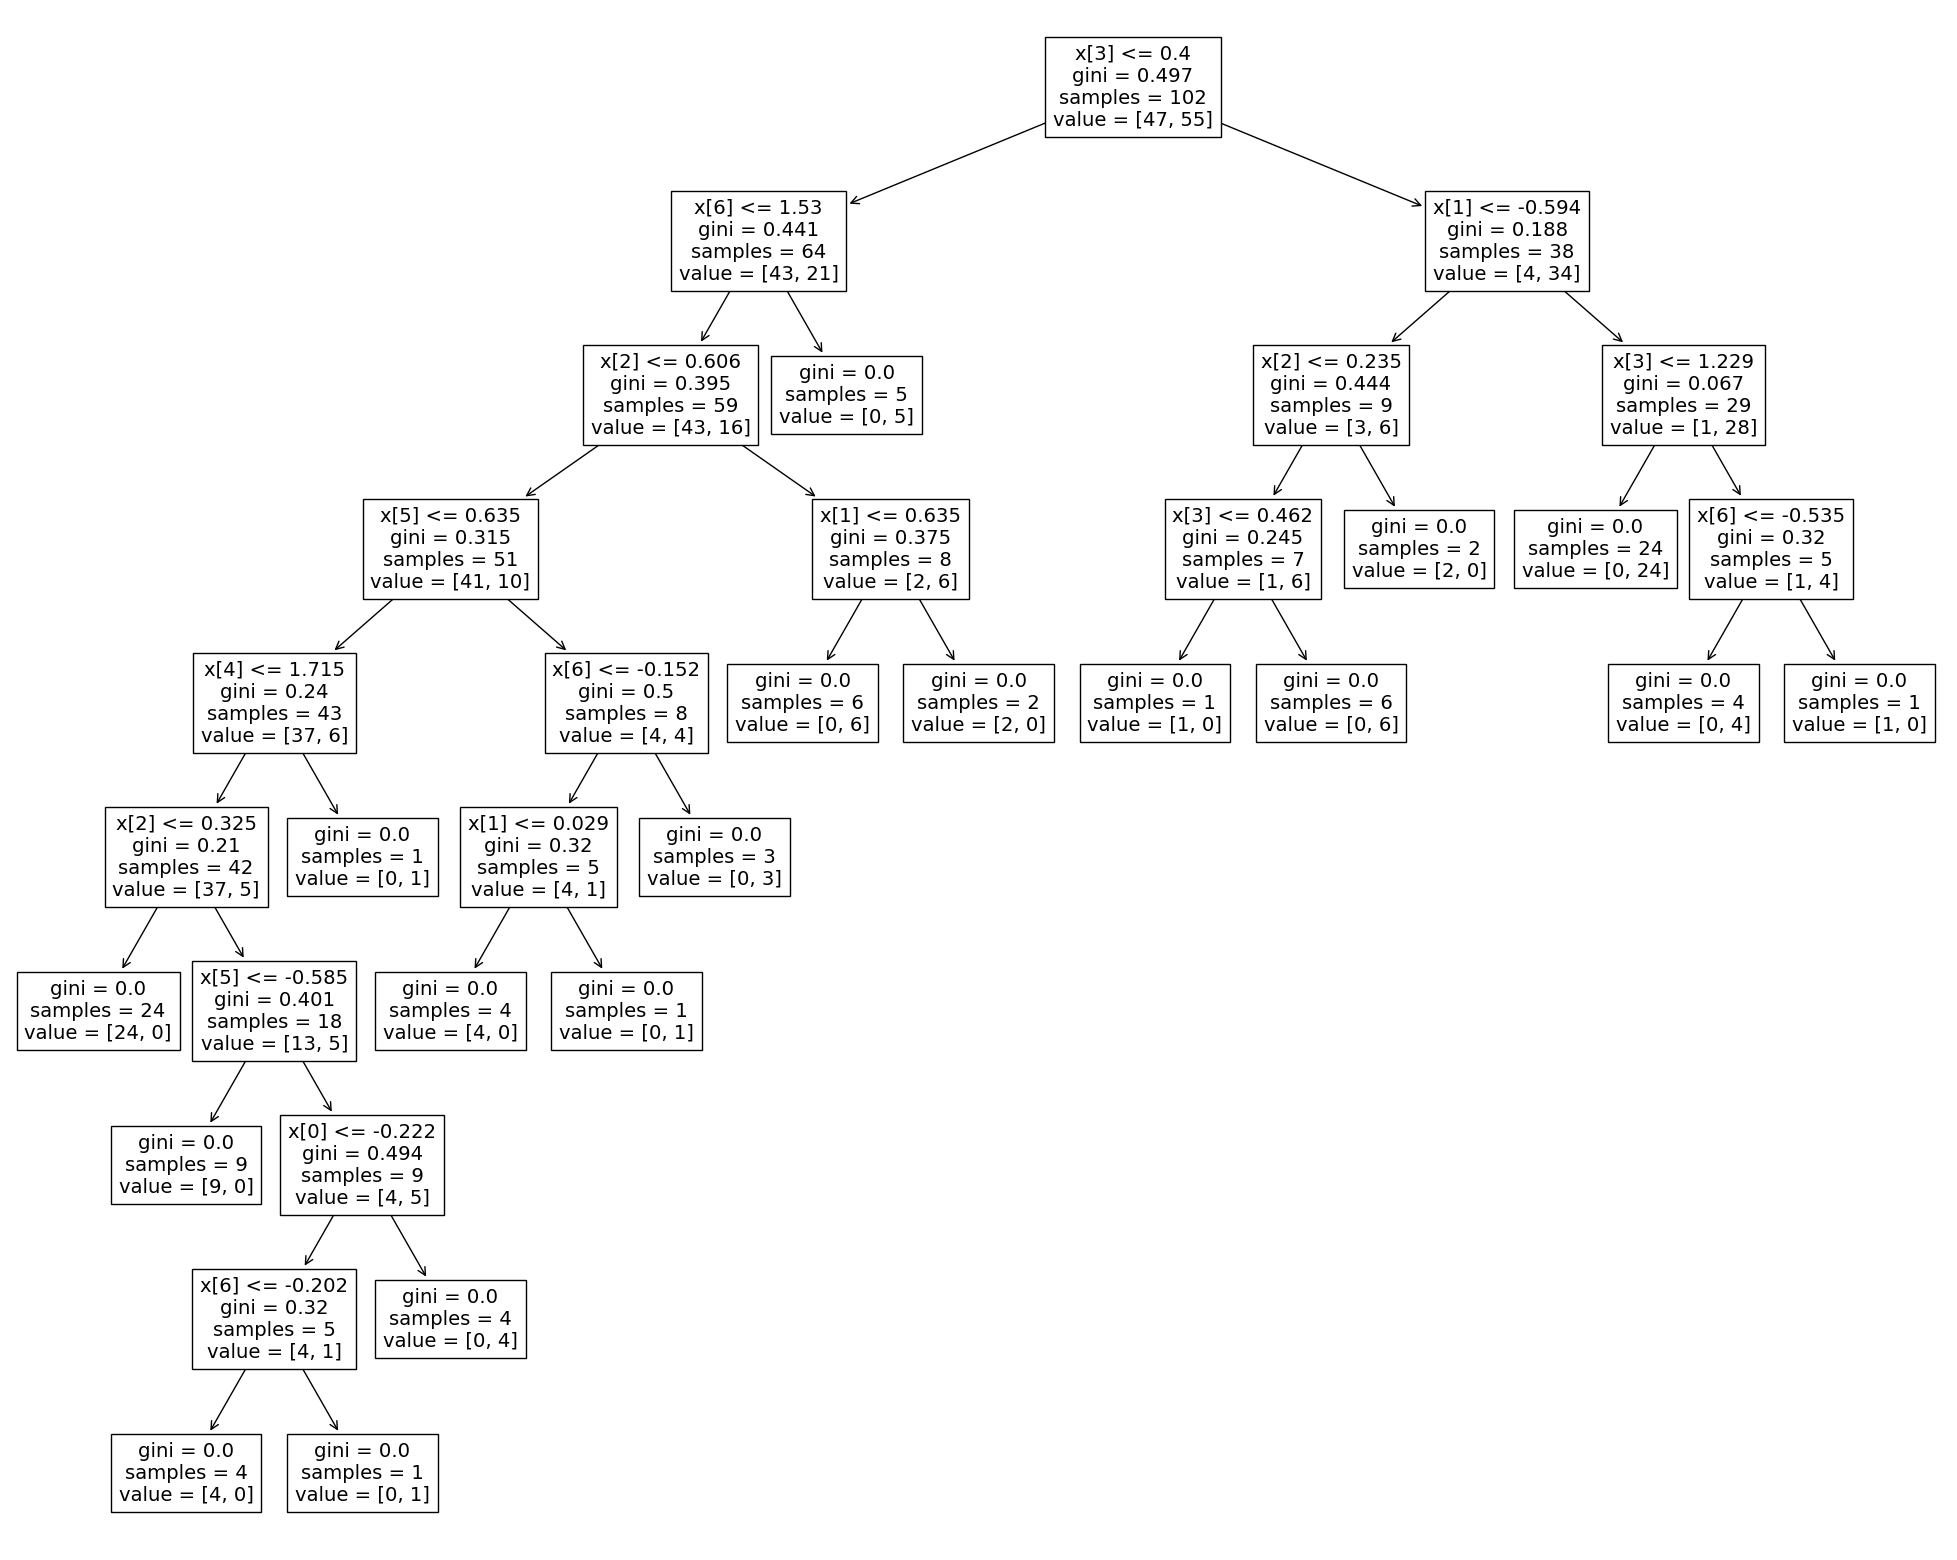

In [22]:
from sklearn import tree
fig = plt.figure(figsize=(25,20))
tree.plot_tree(classifier)
plt.show()

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [24]:
print("Coefficient of our model", regressor.coef_)
print("intercept  of our model", regressor.intercept_)

Coefficient of our model [ 0.11869938 -0.59603247 -1.02564181 -0.13801832 -0.72231435 -0.2078134
 -1.2819193  -0.44667606 -0.00730384]
intercept  of our model 1.5392156862745212


In [25]:
y_pred = regressor.predict(X_test)
print(y_test)
print(y_pred)

[1 1 1 2 2 1 1 1 2 1 1 2 2 1 2 2 1 1 2 1 2 1 2 2 2 1 2 2 2 2 2 1 1 1 1 1 1
 1 2 2 1 2 1 2]
[ 0.99420744  1.18179189  1.35176871  1.41190206  1.05967704  1.49846433
  1.52925989  1.41406635  2.91131721  1.42732938  1.24651052  0.95386898
  2.16459198  1.67942854  1.59354506  1.45494352  1.16777587  1.36312349
  1.48601011  1.32461908  1.35165409  1.34953     1.49187653  1.18267103
  1.31818689  1.13553913  1.46098181  1.61131209  1.29323624  3.33025089
  1.46403494  1.41682317  1.64415879  1.6303131   1.42363459  1.15477026
  1.74259113  1.29866703  2.90246813  4.11496264  1.12770357  2.75016904
 -0.86648988  1.18224354]


In [26]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

-1.0528627420542689


#### 1. For the model we created in lab session write the following results

In [ ]:
Accuracy= 79.54545454545455
Precision= 79.54545454545455
F1 Score = 79.54545454545455
R2 Score= -1.0528627420542689

#### 2. Crete the model with following settings
a. Criterion = log_loss
b. Splitter = random
c. max_features = sqrt
d. random_state = any number of your choice

In [27]:
model = DecisionTreeClassifier(
    criterion='log_loss',
    splitter='random',
    max_features='sqrt',
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Print the model details
print(model)

# Evaluate the model on the test set (optional)
accuracy = model.score(X_test, y_test)
print(f"Model accuracy on test set: {accuracy:.2f}")

DecisionTreeClassifier(criterion='log_loss', max_features='sqrt',
                       random_state=42, splitter='random')
Model accuracy on test set: 0.64


In [29]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model = DecisionTreeClassifier(
    criterion='log_loss',
    splitter='random',
    max_features='sqrt',
    random_state=42
)

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate performance metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

# Print the results
print(f"Accuracy: {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall: {recall:.2f}")
print(f"F1 Score: {f1:.2f}")

Accuracy: 0.64
Precision: 0.65
Recall: 0.64
F1 Score: 0.63
